In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_ANN_LSTM/population_render.csv'
data = pd.read_csv(path)
data["Year"] = pd.to_datetime(data["Year"])
index_data = data.set_index(["Year"], drop=True)

# Check data
index_data.head()

,Population
Year,
2005-12-31,83.832661
2006-12-31,84.617540
2007-12-31,85.419591
2008-12-31,86.243413
2009-12-31,87.092252


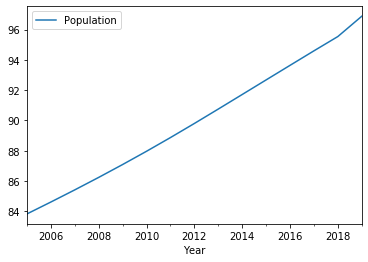

In [3]:
df = index_data[["Population"]]
df.plot()

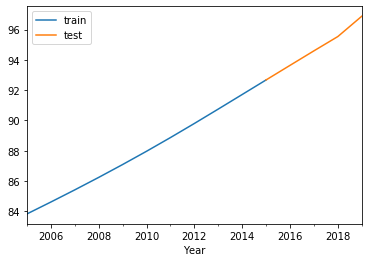

In [4]:
# Split data
split_date = pd.Timestamp('2015-12-31')

train = df.loc[:split_date]
test = df.loc[split_date:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train_scale = scale.fit_transform(train)
test_scale = scale.transform(test)

In [6]:
# Artificial Neural Network

# Split data into x (train,test) and y (train,test)
X_train = train_scale[:-1]
y_train = train_scale[1:]

X_test = test_scale[:-1]
y_test = test_scale[1:]

In [7]:
# Import dependencies
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [8]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')
early_stop = EarlyStopping(monitor ='loss', patience=35, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1896
Epoch 2/200
10/10 [==============================] - 0s 962us/step - loss: 0.1421
Epoch 3/200
10/10 [==============================] - 0s 777us/step - loss: 0.1051
Epoch 4/200
10/10 [==============================] - 0s 830us/step - loss: 0.0766
Epoch 5/200
10/10 [==============================] - 0s 817us/step - loss: 0.0555
Epoch 6/200
10/10 [==============================] - 0s 864us/step - loss: 0.0401
Epoch 7/200
10/10 [==============================] - 0s 924us/step - loss: 0.0291
Epoch 8/200
10/10 [==============================] - 0s 755us/step - loss: 0.0214
Epoch 9/200
10/10 [==============================] - 0s 829us/step - loss: 0.0162
Epoch 10/200
10/10 [==============================] - 0s 959us/step - loss: 0.0127
Epoch 11/200
10/10 [==============================] - 0s 859us/step - loss: 0.0105
Epoch 12/200
10/10 [==============================] - 0s 812us/step - loss: 0.0091
Epoch 13/200
10

10/10 [==============================] - 0s 722us/step - loss: 2.0624e-05
Epoch 191/200
10/10 [==============================] - 0s 702us/step - loss: 2.0526e-05
Epoch 192/200
10/10 [==============================] - 0s 706us/step - loss: 2.0428e-05
Epoch 193/200
10/10 [==============================] - 0s 682us/step - loss: 2.0331e-05
Epoch 194/200
10/10 [==============================] - 0s 793us/step - loss: 2.0234e-05
Epoch 195/200
10/10 [==============================] - 0s 738us/step - loss: 2.0138e-05
Epoch 196/200
10/10 [==============================] - 0s 701us/step - loss: 2.0042e-05
Epoch 197/200
10/10 [==============================] - 0s 705us/step - loss: 1.9947e-05
Epoch 198/200
10/10 [==============================] - 0s 719us/step - loss: 1.9852e-05
Epoch 199/200
10/10 [==============================] - 0s 723us/step - loss: 1.9758e-05
Epoch 200/200
10/10 [==============================] - 0s 782us/step - loss: 1.9665e-05


In [9]:
# Prediction
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)

In [11]:
# Save model
model.save('ANN_population.h5')

In [12]:
model_ann = load_model('ANN_test_population.h5')
y_pred_test_ANN = model_ann.predict(X_test)

In [13]:
# R2 score
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# MAPE
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100)

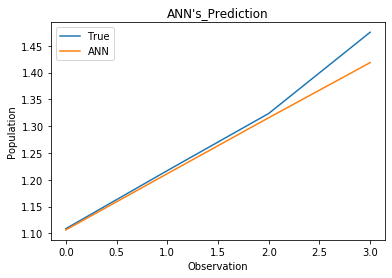

4/4 [==============================] - 0s 3ms/step
ANN: 0.000828
The R2 score on the Train set is:	0.999777042
The Adjusted R2 score on the Train set is:	0.999749173

The R2 score on the Test set is:	0.954841695
The Adjusted R2 score on the Test set is:	0.932262543
MAPE score is: 1.2797853201254434


In [14]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Graphing
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN Prediction")
plt.xlabel('Observation')
plt.ylabel('Population')
plt.legend()
plt.show()

# Scoring
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

# R2 Scores
print("The R2 score on the Train set is:\t{:0.9f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.9f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.9f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.9f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

# MAPE Score
print("MAPE score is: " + str(MAPE(y_test, y_pred_test_ANN)))